<center>
    <b><font size="6",color='#00759c'>LAB 5: The normal distribution</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>

In this lab we’ll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we’ll use the graphical tools of R to assess the normality of our data and also learn how to generate random numbers from a normal distribution.

This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

## The Data

In [1]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

Let’s take a quick peek at the first few rows of the data.

In [2]:
head(bdims)

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


You’ll see that for every observation we have 25 measurements, many of which are either diameters or girths. A key to the variable names can be found at http://www.openintro.org/stat/data/bdims.php, but we’ll be focusing on just three columns to get started: weight in kg (wgt), height in cm (hgt), and sex (1 indicates male, 0 indicates female).

Since males and females tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another with only women.

In [5]:
mdims <- subset(bdims, sex == 1)
fdims <- subset(bdims, sex == 0)

\begin{exercise}
Make a histogram of men’s heights and a histogram of women’s heights. How would you compare the various aspects of the two distributions?
\end{exercise}

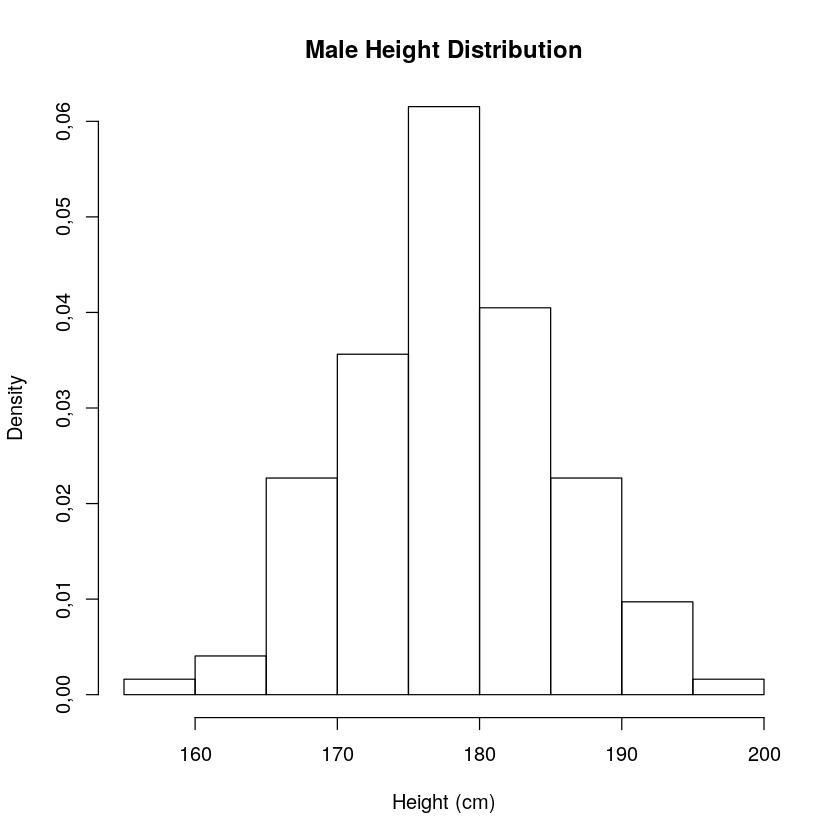

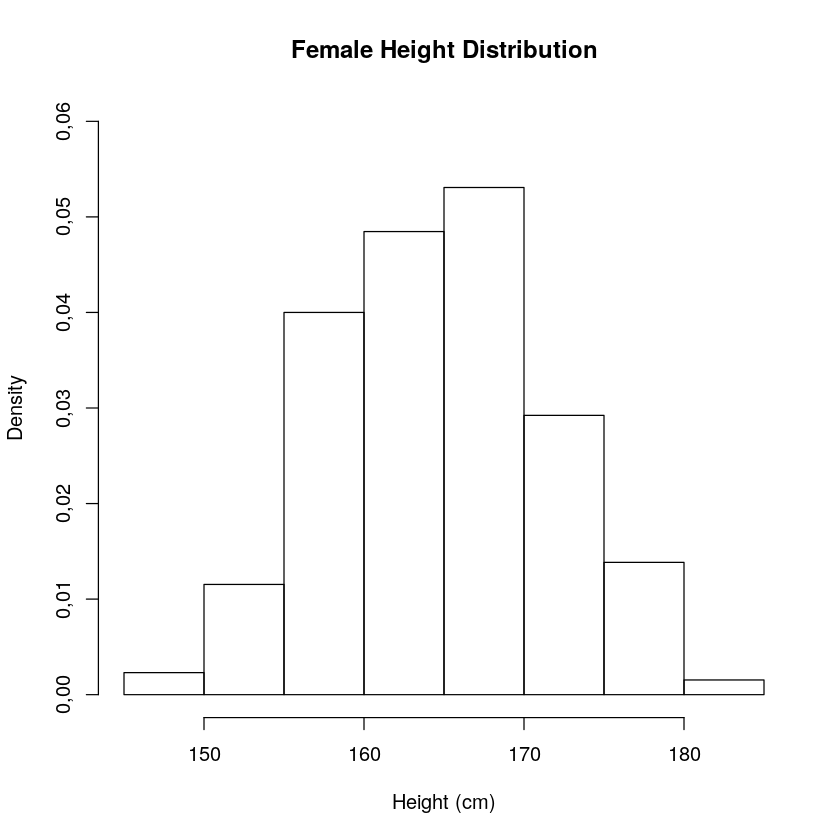

In [35]:
hist(mdims$hgt, main = "Male Height Distribution", xlab = "Height (cm)",probability = TRUE, ylim = c(0, 0.06))
hist(fdims$hgt, main = "Female Height Distribution", xlab = "Height (cm)",probability = TRUE, ylim = c(0, 0.06))

- #### Both male and female heights are normally distributed.
- #### The female distribution is slightly right skewed.
- #### Males tend to be taller than females.<br>

## The normal distribution

In [36]:
fhgtmean <- mean(fdims$hgt)
fhgtsd   <- sd(fdims$hgt)

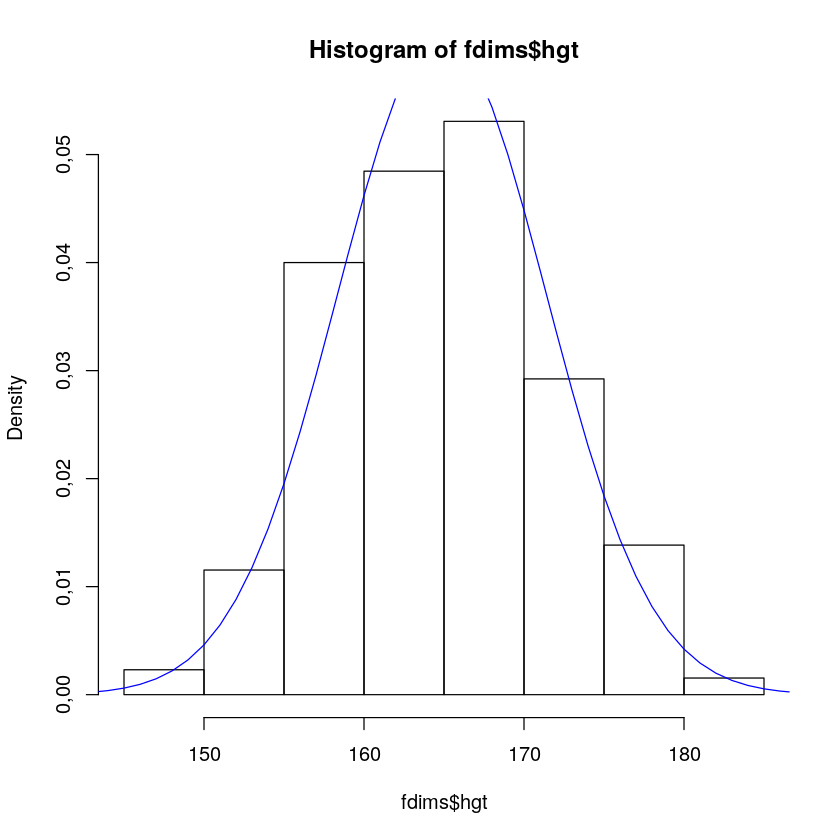

In [49]:
hist(fdims$hgt, probability = TRUE)
x <- 140:190
y <- dnorm(x = x, mean = fhgtmean, sd = fhgtsd)
lines(x = x, y = y, col = "blue")

\begin{exercise}
Based on the this plot, does it appear that the data follow a nearly normal distribution?
\end{exercise}
#### As we can see in the plot above, it apperars that the distribution of heights in females is normal.

## Evaluating the normal distribution

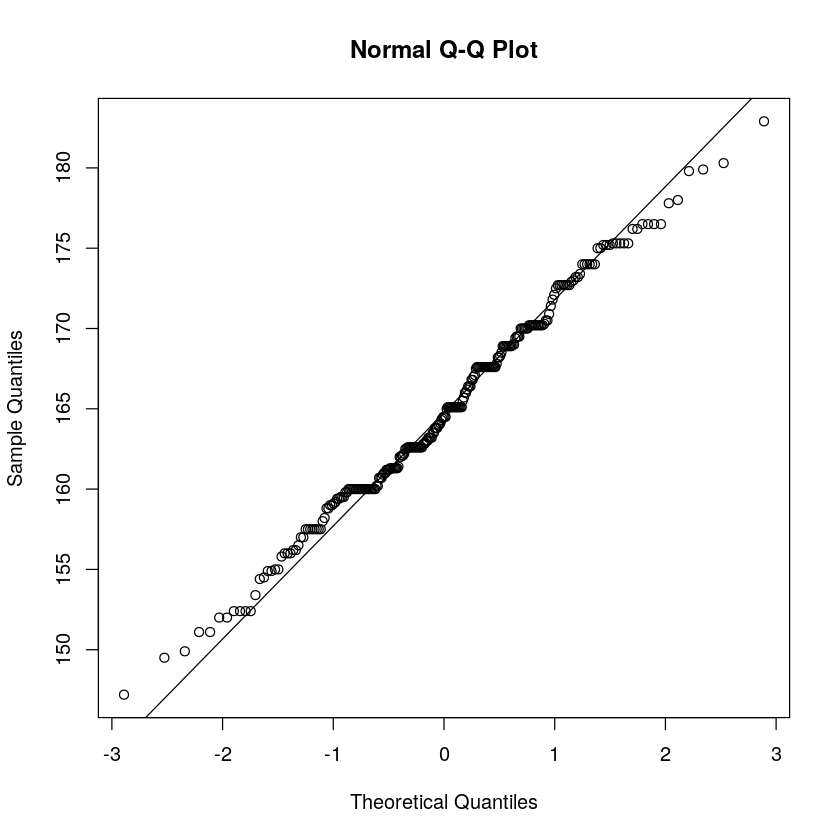

In [50]:
qqnorm(fdims$hgt)
qqline(fdims$hgt)

In [51]:
sim_norm <- rnorm(n = length(fdims$hgt), mean = fhgtmean, sd = fhgtsd)

\begin{exercise}
Make a normal probability plot of sim_norm. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
\end{exercise}

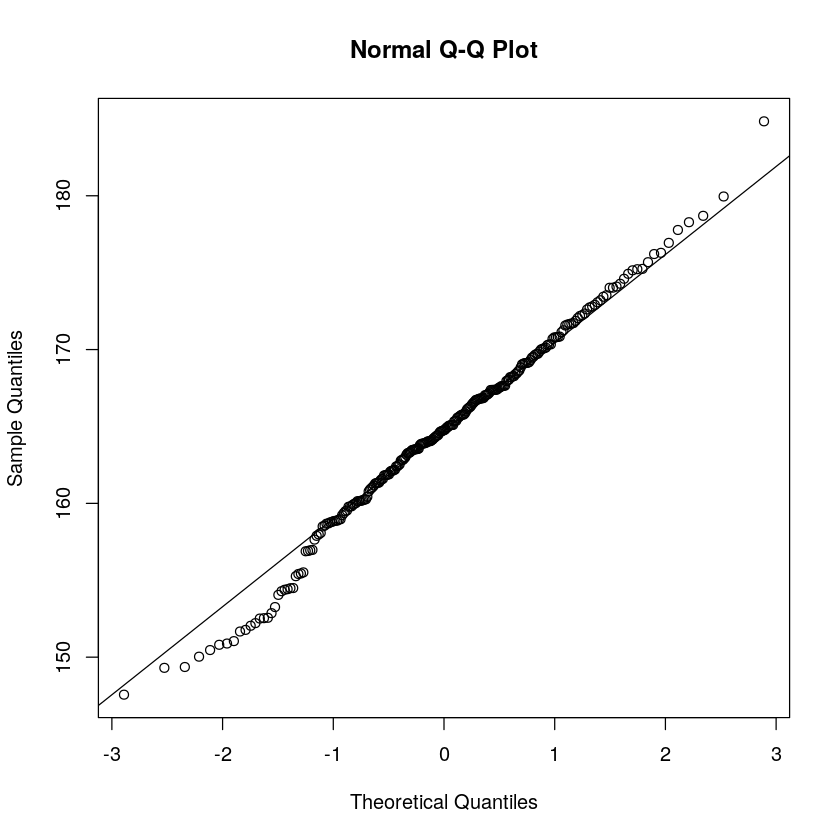

In [52]:
qqnorm(sim_norm)
qqline(sim_norm)

- #### Even though we created a qqplot from a normal distribution, we can see that not all the points fall on the line. This is normal due to randomly selected numbers from a normal distribution.

- #### Taking this into consideration, we can say that the probability plot for the real data is normal as well.

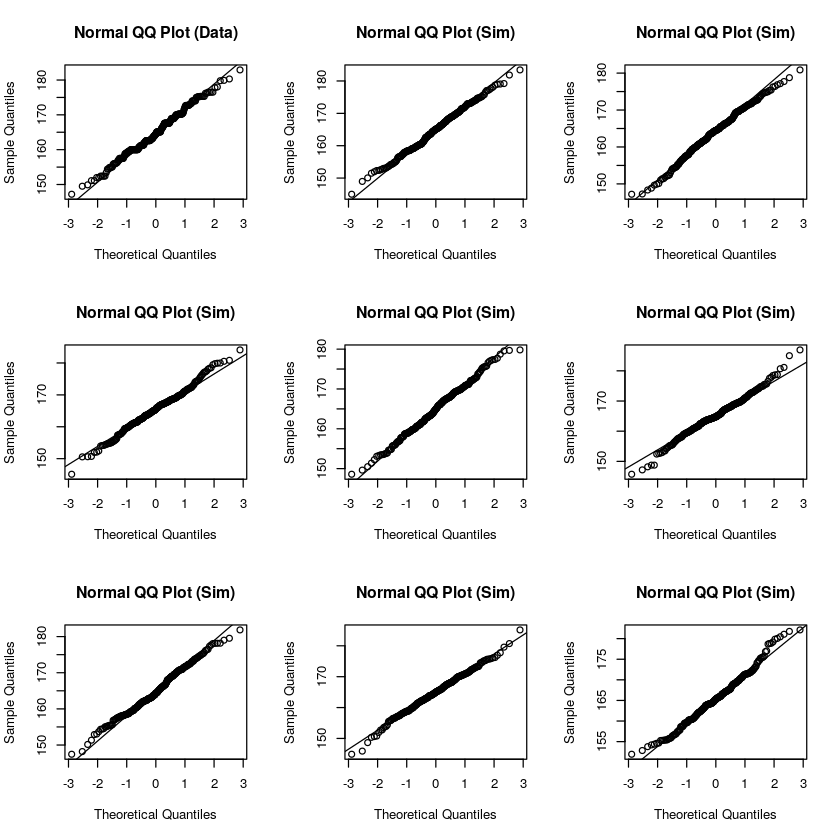

In [53]:
qqnormsim(fdims$hgt)

\begin{exercise}
Does the normal probability plot for fdims$hgt look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?
\end{exercise}

- #### The normal probability plot for hgt for females looks similar to the plots created for the simulated data.

- #### Thus, we can say that the probability plot for the real data is normal as well.

\begin{exercise}
Using the same technique, determine whether or not female weights appear to come from a normal distribution.
\end{exercise}

In [59]:
fwgtmean <- mean(fdims$wgt)
fwgtsd   <- sd(fdims$wgt)

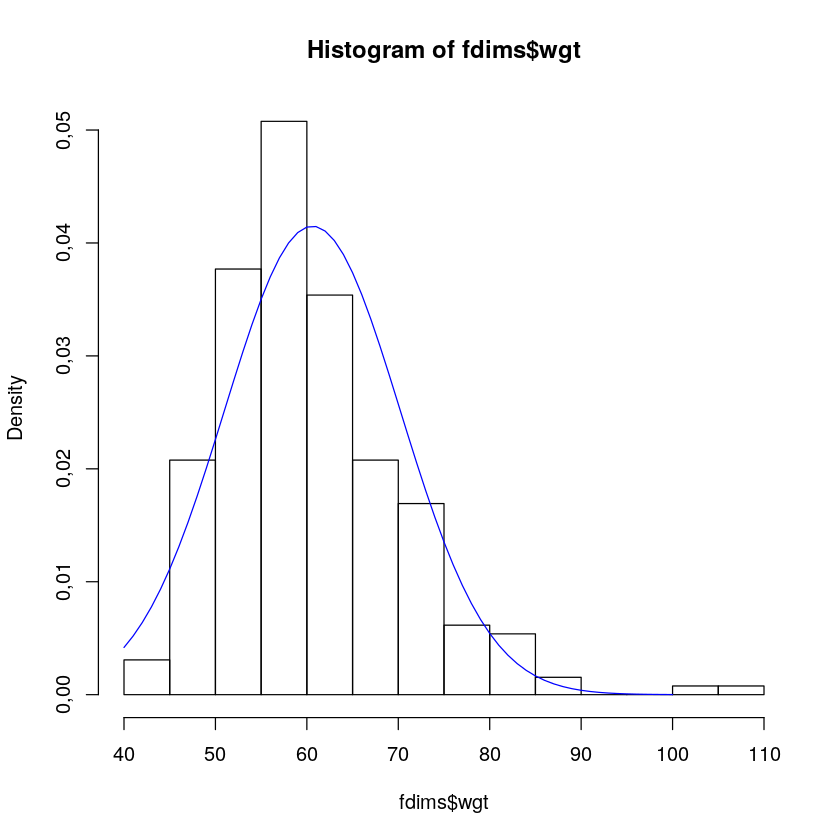

In [62]:
hist(fdims$wgt, probability = TRUE)
x <- 40:100
y <- dnorm(x = x, mean = fwgtmean, sd = fwgtsd)
lines(x = x, y = y, col = "blue")

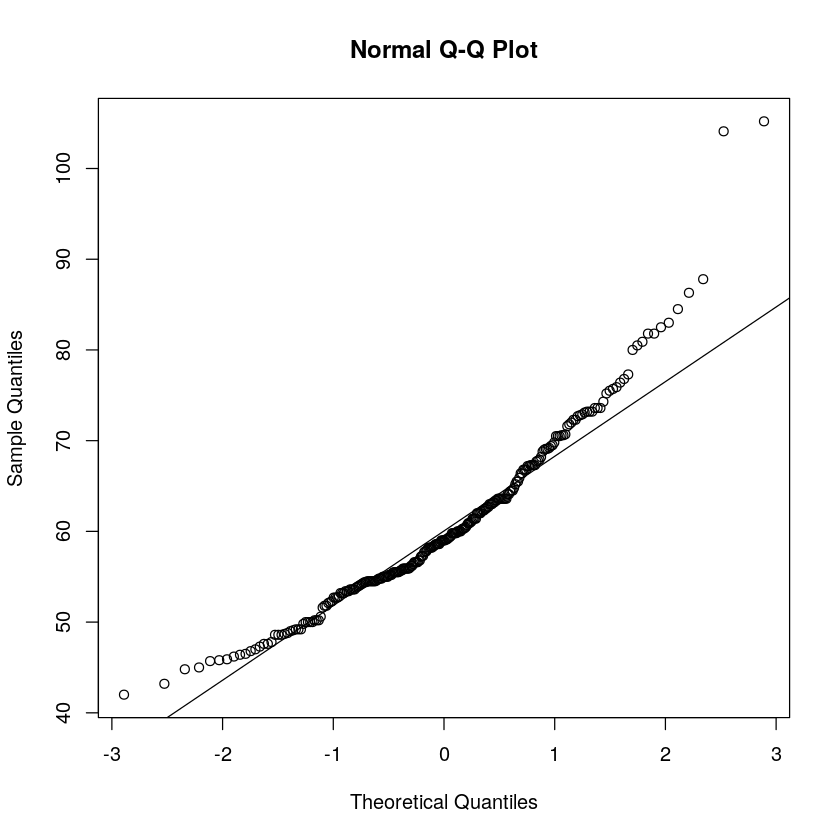

In [54]:
qqnorm(fdims$wgt)
qqline(fdims$wgt)

In [56]:
sim_norm <- rnorm(n = length(fdims$wgt), mean = fwgtmean, sd = fwgtsd)

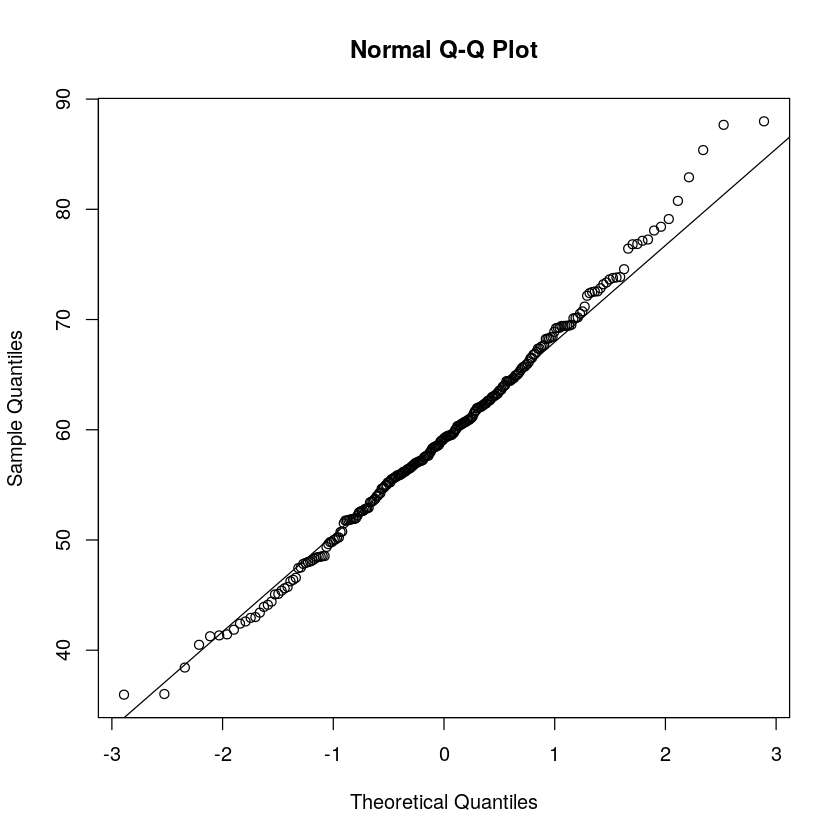

In [57]:
qqnorm(sim_norm)
qqline(sim_norm)

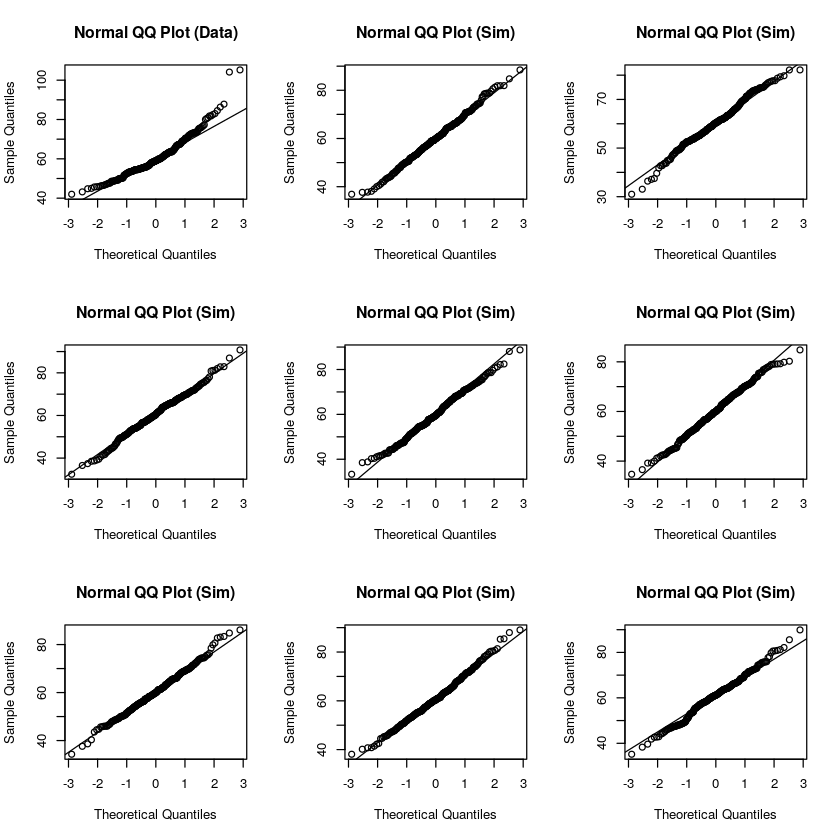

In [58]:
qqnormsim(fdims$wgt)

- #### By looking at the histogram we can see that the distribution of weight is right skewed.
- #### By comparing the Q-Q plot of the real data to the Q-Q plots of the simulated data, we observe that the points from the real data diverge from the normal distribution line significantly more than the points from the simulated data.
- #### Thus, we can conclude that the female weights do not come from a normal distribution.

## Normal probabilities

In [64]:
1 - pnorm(q = 182, mean = fhgtmean, sd = fhgtsd)

[1] 0,004434387

In [65]:
sum(fdims$hgt > 182) / length(fdims$hgt)

[1] 0,003846154

\begin{exercise}
Write out two probability questions that you would like to answer; one regarding female heights and one regarding female weights. Calculate the those probabilities using both the theoretical normal distribution as well as the empirical distribution (four probabilities in all). Which variable, height or weight, had a closer agreement between the two methods?
\end{exercise}

- #### The first question that we would like to answer is what is the proportion of females shorter than 165cm?

In [67]:
pnorm(q = 165, mean = fhgtmean, sd = fhgtsd)

[1] 0,5077833

In [68]:
sum(fdims$hgt < 165) / length(fdims$hgt)

[1] 0,5076923

- #### The second question that we would like to answer is what is the proportion of females that weigh between 55 and 65kg?

In [69]:
pnorm(q = 65, mean = fwgtmean, sd = fwgtsd) - pnorm(q = 55, mean = fwgtmean, sd = fwgtsd)

[1] 0,3962188

In [71]:
sum((fdims$wgt > 55) & (fdims$wgt < 65)) / length(fdims$wgt)

[1] 0,4307692

- #### The height variable has a closer agreement between the two methods, which is expected because its distribution is closer to a normal distribution than the distribution of weight.

# On Your Own

<font size="4">

1. Now let’s consider some of the other variables in the body dimensions data set. Using the figures on
the next page, match the histogram to its normal probability plot. All of the variables have been
standardized (first subtract the mean and then divide by the standard deviation), so the units won’t be
of any help. If you are uncertain based on these figures, generate the plots in SAS to check.

</font>

<font size="3">
    a. The histogram for female biiliac (pelvic) diameter (bii_di) belongs to normal probability plot letter B.
</font>  

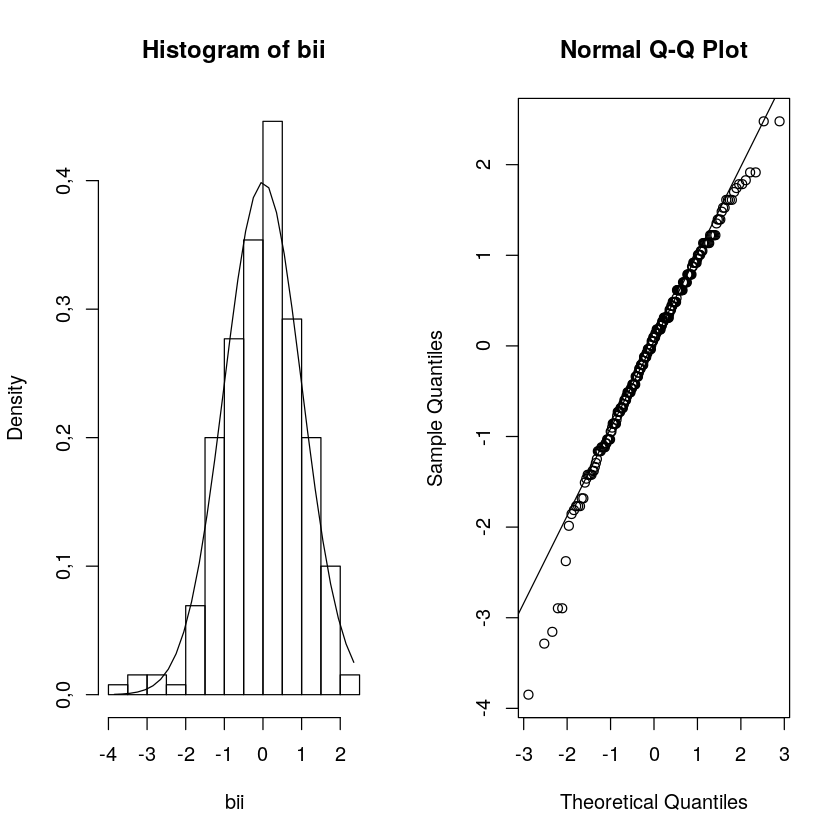

In [85]:
# for female biiliac (pelvic) diameter
par(mfrow = c(1,2))
bii <- (fdims$bii.di - mean(fdims$bii.di))/sd((fdims$bii.di))
hist(bii,probability = T)
x <- seq(min(bii),max(bii), by = 0.2)
y <- dnorm(x,mean(bii),sd(bii))
lines(x, y)
qqnorm(bii)
qqline(bii)

<font size="3">
    b. The histogram for female elbow diameter (elb_di) belongs to normal probability plot letter C.
</font>  


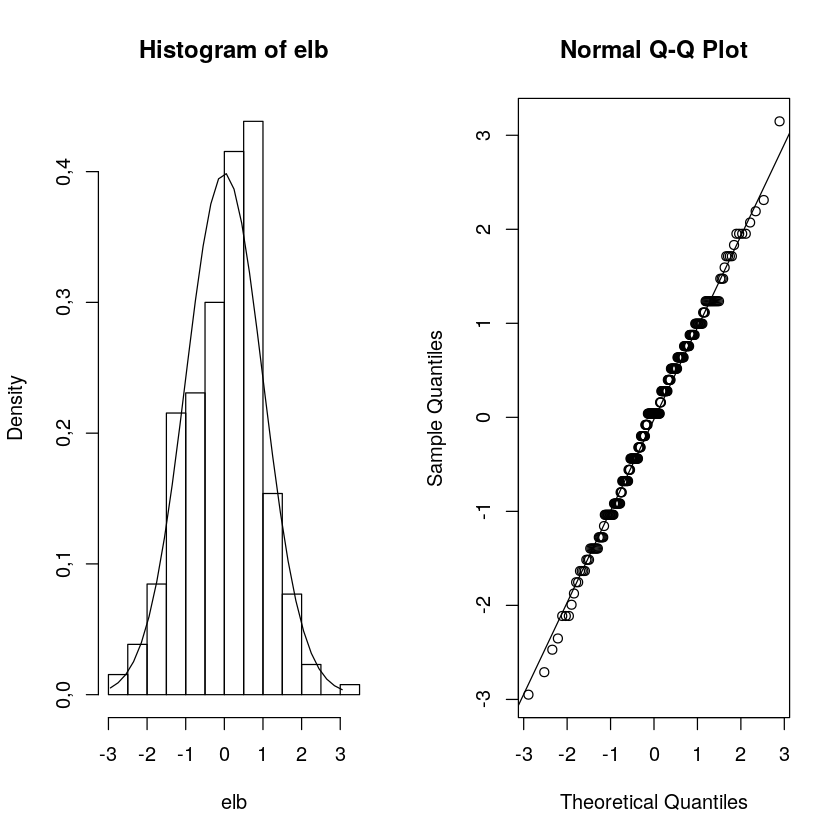

In [83]:
# for female elbow diameter
par(mfrow = c(1,2))
elb <- (fdims$elb.di - mean(fdims$elb.di))/sd((fdims$elb.di))
hist(elb,probability = T)
x <- seq(min(elb),# for female biiliac (pelvic) diameter
max(elb), by = 0.2)
y <- dnorm(x,mean(elb),sd(elb))
lines(x, y)
qqnorm(elb)
qqline(elb)

<font size="3">
    c. The histogram for general age (age) belongs to normal probability plot letter D.
</font>  


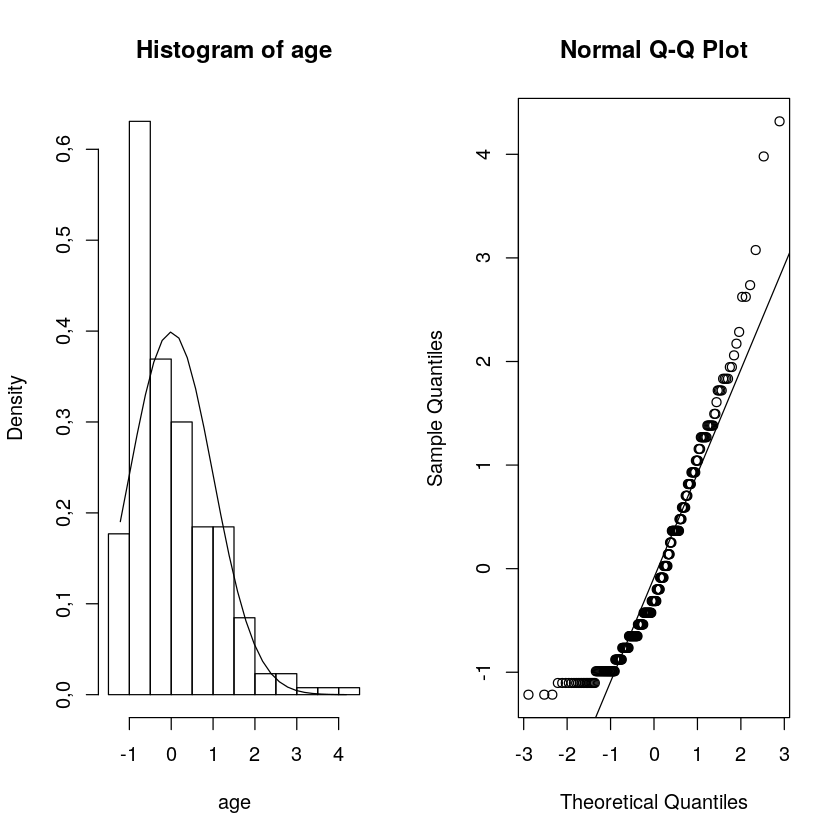

In [79]:
# for female age  
par(mfrow = c(1,2))
age <- (fdims$age - mean(fdims$age))/sd((fdims$age))
hist(age,probability = T)
x <- seq(min(age),max(age), by = 0.2)
y <- dnorm(x,mean(age),sd(age))
lines(x, y)
qqnorm(age)
qqline(age)

<font size="3">
      d. The histogram for female chest depth (che_de) belongsto normal probability plot letter A.
</font>  


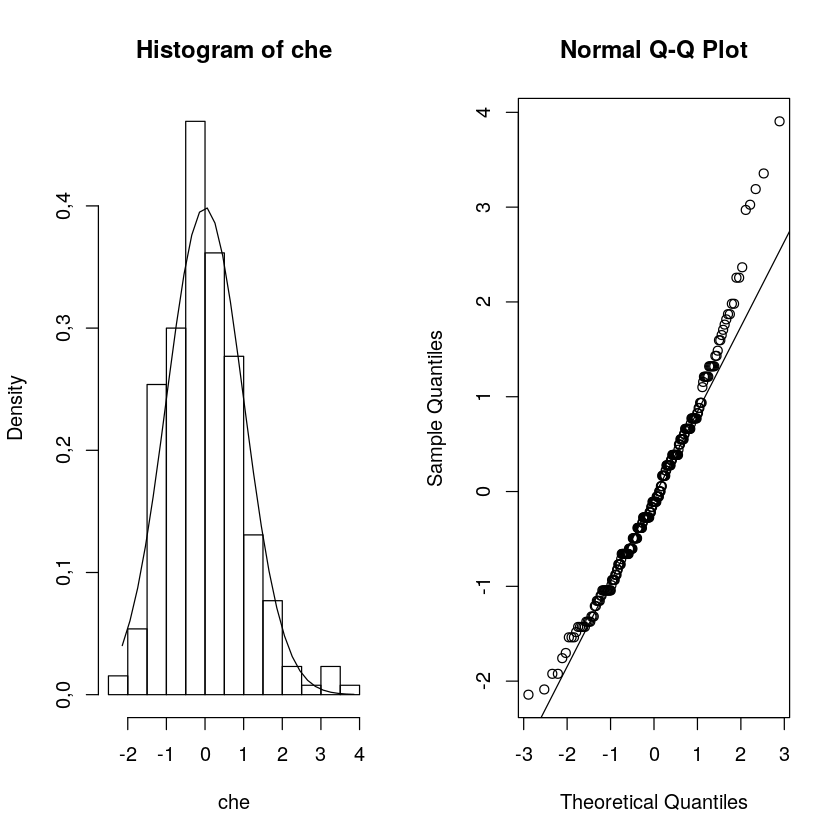

In [78]:
# for female che diameter
par(mfrow = c(1,2))
che <- (fdims$che.di - mean(fdims$che.di))/sd((fdims$che.di))
hist(che,probability = T)
x <- seq(min(che),max(che), by = 0.2)
y <- dnorm(x,mean(che),sd(che))
lines(x, y)
qqnorm(che)
qqline(che)

<font size="4">
2. Note that normal probability plots C and D have a slight stepwise pattern. Why do you think this is
the case?
</font>

<font size="3">

Probability plot D represents general age and plot C represents females elbow diameter. The stepwise pattern for general age is explained by the discrete nature of the data. The elbow diameter is not discrete, so the stepwise pattern for this variable may come from numerous repeated measurements of the same values. This may indicate a poor choice of device for the elbow diameter measurements.

</font>


<font size="4">
    3. As you can see, normal probability plots can be used both to assess normality and visualize skewness.
    <br>
    Make a normal probability plot for female knee diameter (kne_di). Based on this normal probability
    plot is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your
    findings.
</font>

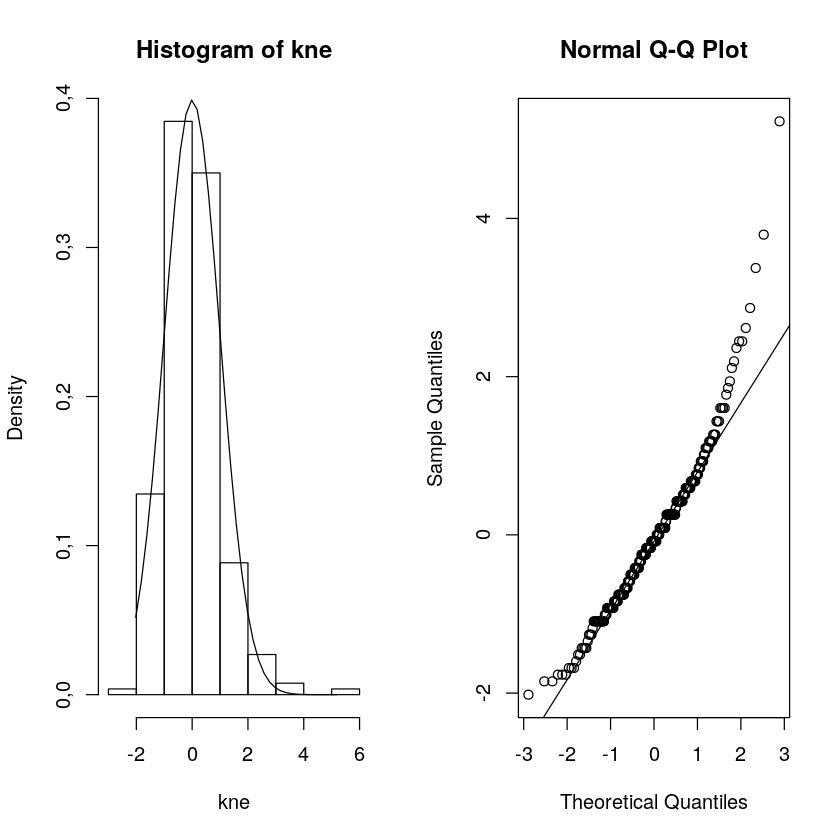

In [87]:
# for female kne diameter
par(mfrow = c(1,2))
kne <- (fdims$kne.di - mean(fdims$kne.di))/sd((fdims$kne.di))
hist(kne,probability = T)
x <- seq(min(kne),max(kne), by = 0.2)
y <- dnorm(x,mean(kne),sd(kne))
lines(x, y)
qqnorm(kne)
qqline(kne)

<font size="3">
    The normal probability plot is positively curved, so the distribution is right skewed.
</font>